### My first project on GitHub 
   <p> The purpose is to find suitable material for applied interest based on open access resources. </p>
   <p> First step : Import necessary libraries for scientific computing. </p>

In [237]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Loading and Reading Data

<p>Now we are ready to load and read the data using a Pandas DataFrame.</p>  
<p>The chosen dataset is taken from the Kaggle website and is available <a href="https://www.kaggle.com/datasets/vinven7/comprehensive-database-of-minerals">here</a>.</p>

In [238]:
# Load the dataset into a DataFrame
df = pd.read_csv('Minerals_Database.csv')
df.head()
#print(df.shape)

,Unnamed: 0,Name,Crystal Structure,Mohs Hardness,Diaphaneity,Specific Gravity,Optical,Refractive Index,Dispersion,Hydrogen,...,Acetate,Phosphate,Sulphate,Carbonate,Ammonium,Hydrated Water,count,Molar Mass,Molar Volume,Calculated Density
0,0,Abenakiite-(Ce),5.0,4.50,0.0,3.240,3.0,1.580,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,23.0,817.339002,0.123390,5.498
1,1,Abernathyite,4.0,2.75,3.0,3.446,3.0,1.592,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,9.0,435.069330,0.056083,6.439
2,2,Abhurite,5.0,2.00,3.0,4.420,3.0,2.085,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,17.0,921.092220,0.122631,6.234
3,3,Abswurmbachite,0.0,0.00,0.0,0.000,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,550.019900,0.033658,13.563
4,4,Actinolite,2.0,5.50,2.0,1.050,4.0,1.634,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,28.0,861.185368,0.112074,6.378


## Dataset Description from the Kaggle Website

This dataset contains information on **3,112 minerals**, including their **chemical compositions, crystal structures, and physical and optical properties**.  

The properties included in this database are:  
- **Crystal structure**  
- **Mohs Hardness**  
- **Refractive Index**  
- **Optical Axes**  
- **Optical Dispersion**  
- **Molar Volume**  
- **Molar Mass**  
- **Specific Gravity**  
- **Calculated Density**  

We can display the list of columns using the `.columns` attribute of the Pandas DataFrame.


## Data Preprocessing

Now we are ready to perform data preprocessing.  

As the first step, we will **identify and handle missing values** and check the **data type of each column**.

In [239]:
# define column names containg physical properties 
phys_properties = ['Crystal Structure', 'Mohs Hardness', 'Diaphaneity', 'Specific Gravity', 'Optical', 'Refractive Index', 'Dispersion']
df1 = df[(df[phys_properties] != 0).all(axis=1)]

## Health and Safety Considerations for Optics in Commercial Devices

Since we would like to find minerals to use for optics in commercial devices, for health safety, I need to remove all minerals containing radioactive elements.

After that, I redefine a new DataFrame containing only the names of minerals and their optical properties for further analysis.

In [240]:
# Create the 'Radioactive' column by summing the radioactive elements
df1['Radioactive'] = (df1['Uranium'] + df1['Thorium'] + df1['Radium'] + df1['Polonium'] +
                       df1['Plutonium'] + df1['Americium'] + df1['Curium'] + df1['Astatine'] +
                       df1['Neptunium'] + df1['Francium'] + df1['Livermorium'] + df1['Flerovium'] +
                       df1['Actinium'] + df1['Moscovium'] + df1['Einsteinium'] + df1['Fermium'] +
                       df1['Promethium'] + df1['Nihonium'] + df1['Californium'] + df1['Protactinium'] +
                       df1['Bohrium'] + df1['Technetium'] + df1['Berkelium'] + df1['Radon'])

# Drop rows where any radioactive element has a non-zero value
df2 = df1[df1['Radioactive'] == 0]

# Drop the radioactive columns after filtering
df = df2[['Name', 'Crystal Structure', 'Mohs Hardness', 'Diaphaneity', 'Specific Gravity', 'Optical', 'Refractive Index', 'Dispersion']]
df.reset_index(drop = True, inplace = True)
df

,Name,Crystal Structure,Mohs Hardness,Diaphaneity,Specific Gravity,Optical,Refractive Index,Dispersion
0,Anatase,4.0,5.75,1.0,3.880,3.0,2.525,0.213
1,Andradite,6.0,6.75,2.0,3.853,1.0,1.887,0.057
2,Benitoite,5.0,6.25,2.0,3.600,3.0,1.780,0.046
3,Beryl,5.0,7.75,2.0,2.760,3.0,1.582,0.014
4,Beryllonite,2.0,5.75,2.0,2.800,4.0,1.557,0.010
5,Boracite,3.0,7.25,2.0,2.950,4.0,1.665,0.024
6,Brazilianite,2.0,5.50,2.0,2.980,4.0,1.614,0.014
7,Brookite,3.0,3.50,1.0,4.130,4.0,2.622,0.131
8,Cassiterite,4.0,6.50,1.0,7.040,3.0,2.049,0.071
9,Cerussite,3.0,3.25,2.0,6.550,4.0,1.984,0.055


## Analyzing Individual Feature Patterns Using Visualization

In [241]:
#We can calculate the correlation between variables
df.corr()

,Crystal Structure,Mohs Hardness,Diaphaneity,Specific Gravity,Optical,Refractive Index,Dispersion
Crystal Structure,1.000000,0.053454,-0.037688,0.317814,-0.869660,0.241509,0.303731
Mohs Hardness,0.053454,1.000000,-0.068365,-0.487442,-0.070795,-0.530051,-0.545694
Diaphaneity,-0.037688,-0.068365,1.000000,-0.261040,0.071538,-0.397050,-0.310774
Specific Gravity,0.317814,-0.487442,-0.261040,1.000000,-0.278061,0.619049,0.595518
Optical,-0.869660,-0.070795,0.071538,-0.278061,1.000000,-0.231262,-0.267218
Refractive Index,0.241509,-0.530051,-0.397050,0.619049,-0.231262,1.000000,0.914605
Dispersion,0.303731,-0.545694,-0.310774,0.595518,-0.267218,0.914605,1.000000


We observe strong dependencies between the **Refractive Index** and **Dispersion**, as well as between the **Crystal Structure** and **Optical Properties**, with the latter referring to how light propagates through the crystal.

## Continuous Numerical Variables:

**Refractive Index** and **Dispersion** are continuous numerical variables.

Continuous numerical variables are those that can take any value within a specific range. A good way to visualize these variables is by using scatterplots with fitted lines.

To begin understanding the (linear) relationship between a variable and the target, we can use `regplot`, which plots the scatterplot along with the fitted regression line. 

(0.0, 0.25373578234380906)

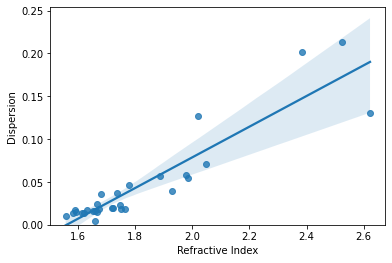

In [242]:
# Create a visualization to better understand the data
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x="Refractive Index", y="Dispersion", data=df)
plt.ylim(0,)

This indicates a positive linear correlation between these two variables, with the regression line closely following a perfect diagonal.

## Categorical Variables

**Crystal Structure** and **Optical** are categorical variables.

Categorical variables describe a characteristic of a data unit, selected from a limited set of categories. A good way to visualize categorical variables is by using `barplot` or `boxplot`.

Let's examine the relationship between **Crystal Structure** and **Optical**, with the latter referring to how light propagates through the crystal.

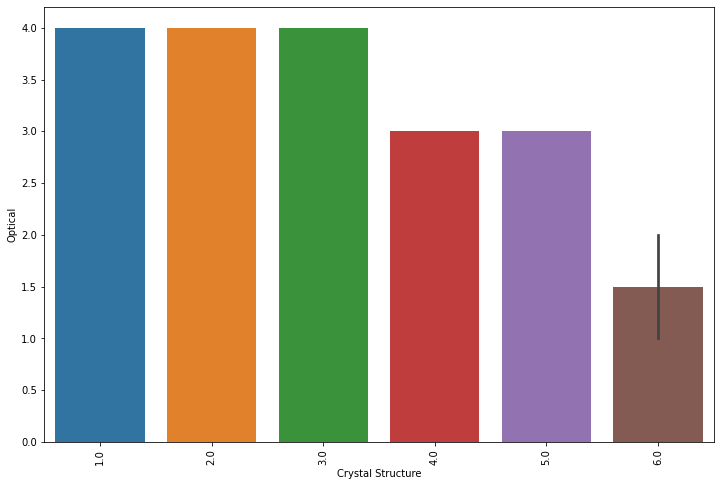

In [243]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Crystal Structure', y='Optical', data=df)
plt.xticks(rotation=90)
plt.xlabel('Crystal Structure')
plt.ylabel('Optical')
plt.show()

The result aligns with expectations based on crystallography, as the type of crystal structure, encoded as integers from 1 to 6, uniquely defines how light propagates through the crystal.

The only exception is when **Crystal Structure** equals 6, which represents the Trigonal Crystal Structure.

### Linear Regression

Create a simple linear regression model using a single feature to fit the pair of **Refractive Index** and **Dispersion**. This will allow us to develop a model for prediction.

In [244]:
#load the modules for linear regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X = df[['Refractive Index']]
Y = df['Dispersion']
lm.fit(X,Y)
Yhat = lm.predict(X)

Generate the Distribution plot for the predicted values and that of the actual values. How well did the model perform?

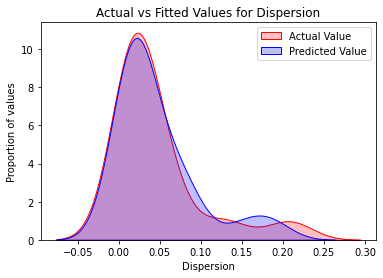

In [245]:
# Create a distribution plot for actual values
ax1 = sns.kdeplot(df['Dispersion'], color="r", label="Actual Value", shade=True)

# Create a distribution plot for predicted values
sns.kdeplot(Yhat, color="b", label="Fitted Values", shade=True, ax=ax1)

plt.title('Actual vs Fitted Values for Dispersion')
plt.xlabel('Dispersion')
plt.ylabel('Proportion of values')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()


We can see that the fitted values are reasonably close to the actual values, as the two distributions overlap to some extent. However, there is still room for improvement, especially for dispersive minerals.

### Polinomial Regression

Let's fit the polynomial using the function <b>polyfit</b>, then use the function <b>poly1d</b> to display the polynomial function.

In [246]:
X = df['Refractive Index']
Y = df['Dispersion']
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(X, Y, 3)
p = np.poly1d(f)
print(p)

         3         2
-0.7759 x + 4.775 x - 9.449 x + 6.092
